   Task:3:              IRIS FLOWER CLASSIFICATION

 PROJECT OBJECTIVE:The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [5]:
## importing all the essential libraries:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
## visualization of our dataset:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
## basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
#to display no. of samples of each class :
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [9]:
df['species'],categories=pd.factorize(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# checking of null values:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

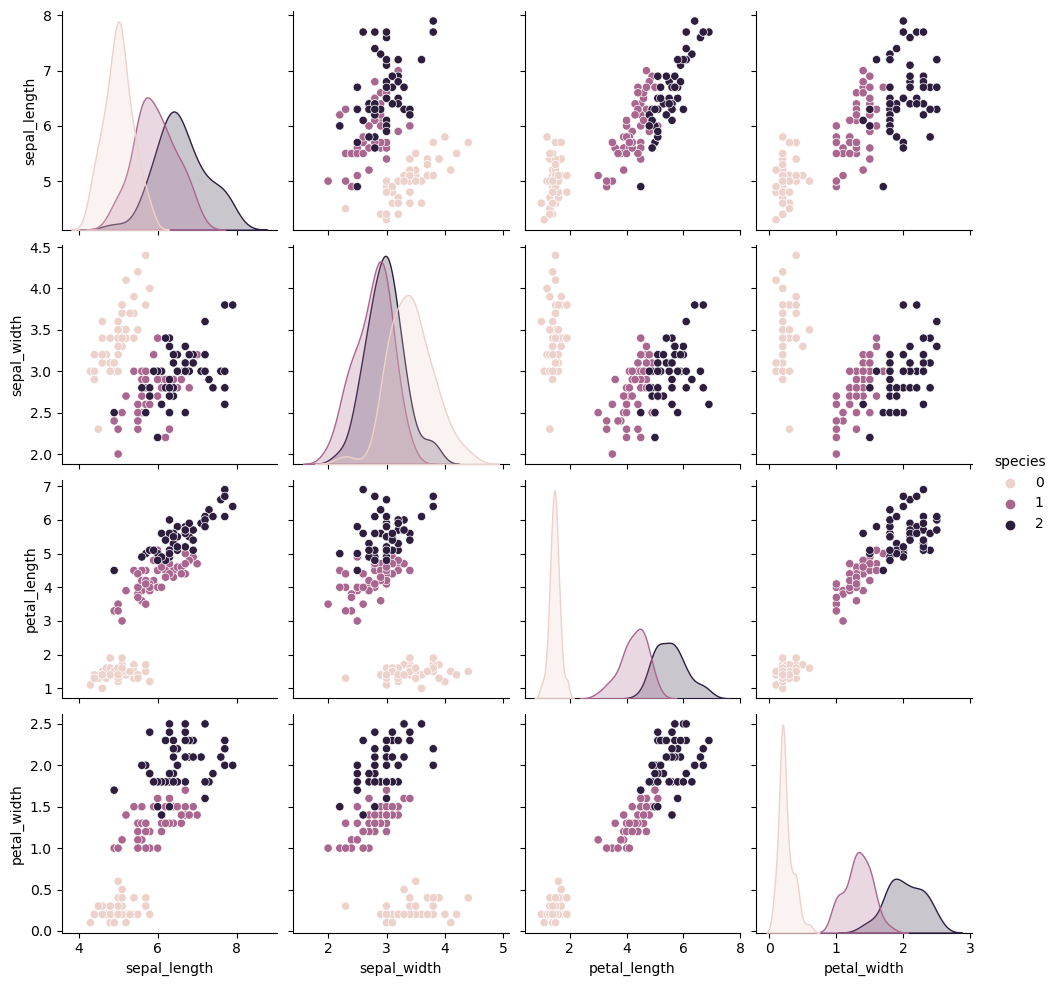

In [11]:
sns.pairplot(df,hue='species')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


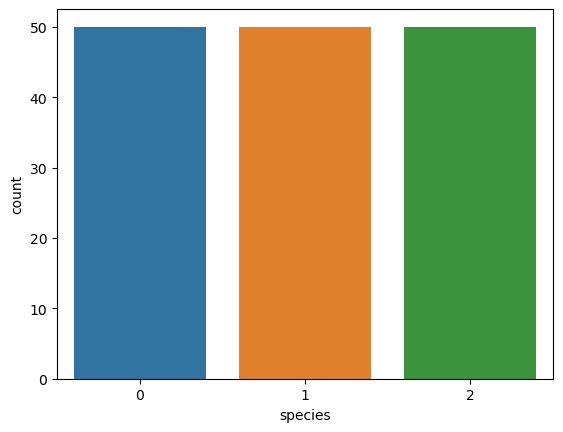

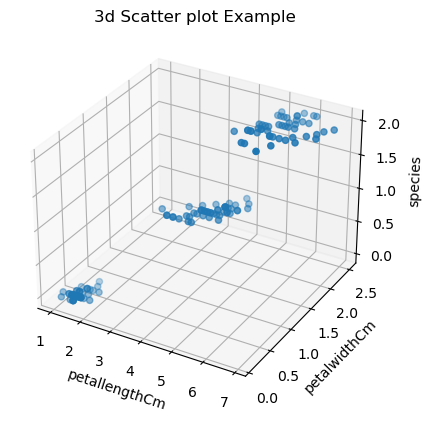

In [15]:
## visualize the dataset:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('petallengthCm')
ax.set_ylabel('petalwidthCm')
ax.set_zlabel('species')
plt.title('3d Scatter plot Example')
plt.show()

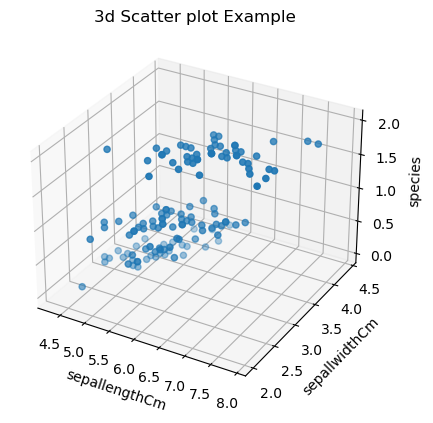

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('sepallengthCm')
ax.set_ylabel('sepallwidthCm')
ax.set_zlabel('species')
plt.title('3d Scatter plot Example')
plt.show()

In [43]:
x=df.drop('species',axis=1)
y=df['species']

In [44]:
## split the data into train and test data set:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train)

     sepal_length  sepal_width  petal_length  petal_width
126           6.2          2.8           4.8          1.8
23            5.1          3.3           1.7          0.5
64            5.6          2.9           3.6          1.3
117           7.7          3.8           6.7          2.2
84            5.4          3.0           4.5          1.5
..            ...          ...           ...          ...
75            6.6          3.0           4.4          1.4
43            5.0          3.5           1.6          0.6
22            4.6          3.6           1.0          0.2
72            6.3          2.5           4.9          1.5
15            5.7          4.4           1.5          0.4

[120 rows x 4 columns]


In [20]:
## using the naive bayes algorithm:
from sklearn.naive_bayes import GaussianNB
nv=GaussianNB()
nv.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred=nv.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2], dtype=int64)

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93         7
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
accuracy_score(y_pred,y_test)

0.9666666666666667

In [24]:
cn=confusion_matrix(y_pred,y_test)
cn

array([[14,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  8]], dtype=int64)

In [25]:
sns.heatmap(cn,annot=True)

<AxesSubplot:>

In [26]:
from sklearn.naive_bayes import MultinomialNB
nv=MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [27]:
y_pred=nv.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2], dtype=int64)

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.89      0.94         9
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [29]:
accuracy_score(y_pred,y_test)

0.9666666666666667